In [1]:
%load_ext watermark


In [2]:
import sys

import seaborn as sns
from teeplot import teeplot as tp

from pylib.cli.run_covaphastsim import main as main_covaphastsim
from pylib.cli.run_volzscreen import main as main_volzscreen
from pylib._glimpse_df import glimpse_df


Covasim 3.1.6 (2024-01-28) — © 2020-2024 by IDM


/usr/local/lib/python3.10/dist-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
%watermark -diwmuv -iv


Last updated: 2025-05-06T21:37:20.526184+00:00

Python implementation: CPython
Python version       : 3.10.12
IPython version      : 7.31.1

Compiler    : GCC 11.4.0
OS          : Linux
Release     : 6.8.0-1027-azure
Machine     : x86_64
Processor   : x86_64
CPU cores   : 4
Architecture: 64bit

sys    : 3.10.12 (main, Feb  4 2025, 14:57:36) [GCC 11.4.0]
teeplot: 1.4.2
seaborn: 0.13.2

Watermark: 2.4.3



In [4]:
teeplot_subdir = "2025-05-03-profile-e2e"
teeplot_subdir


'2025-05-03-profile-e2e'

## Configs


In [5]:
covaphastsim_cfg = {
    "cfg_make_cv_sim_recipe": "make_cv_sim_uk",
    "cfg_make_wt_specs_recipe": "make_wt_specs_uk",
    "cfg_num_mut_sites": 1,
    # divide by 3 for possible alt nucleotides
    "cfg_p_wt_to_mut": 100 * 2.74e-6 / 3,
    "cfg_pop_size": 67_000_000 // 500,
    "cfg_maxseqlen": 390,
    "cfg_refseqs": "https://osf.io/s9xhr/download",
    "cfg_suffix_mut": "'",
    "cfg_suffix_wt": "+",
    "replicate_num": 0,
    "trt_mutmx_active_strain_factor": 1.0,
    "trt_mutmx_rel_beta": 1.0,
    "trt_mutmx_withinhost_r": 2.0,
    "trt_name": "Sben/Gneu",
    "trt_seed": 0,
}


In [6]:
volzscreen_cfg = {
    "cfg_clade_size_thresh": "[8]",
    "cfg_mut_count_thresh_lb": 0,
    "cfg_mut_count_thresh_ub": sys.maxsize,
    "cfg_mut_freq_thresh_lb": 0.0,
    "cfg_mut_freq_thresh_ub": 1.0,
    "cfg_mut_quant_thresh_lb": 0.0,
    "cfg_mut_quant_thresh_ub": 1.0,
    "screen_num": 0,
    "trt_hsurf_bits": 0,
    "trt_n_downsample": 1_000_000,
    "trt_seed": 0,
}


## Run


In [7]:
phylo_df = main_covaphastsim(covaphastsim_cfg)


{'cfg_make_cv_sim_recipe': 'make_cv_sim_uk',
 'cfg_make_wt_specs_recipe': 'make_wt_specs_uk',
 'cfg_maxseqlen': 390,
 'cfg_num_mut_sites': 1,
 'cfg_p_wt_to_mut': 9.133333333333334e-05,
 'cfg_pop_size': 134000,
 'cfg_refseqs': 'https://osf.io/s9xhr/download',
 'cfg_suffix_mut': "'",
 'cfg_suffix_wt': '+',
 'replicate_num': 0,
 'trt_mutmx_active_strain_factor': 1.0,
 'trt_mutmx_rel_beta': 1.0,
 'trt_mutmx_withinhost_r': 2.0,
 'trt_name': 'Sben/Gneu',
 'trt_seed': 0}
Initializing sim with 134000 people for 650 days
Loading location-specific data for "uk"
Note: No cross-immunity specified for vaccine Vaccinate 75 and variant Wildtype+, setting to 1.0
Note: No cross-immunity specified for vaccine Vaccinate 75 and variant Wildtype', setting to 1.0
Note: No cross-immunity specified for vaccine Vaccinate 75 and variant Beta+, setting to 1.0
Note: No cross-immunity specified for vaccine Vaccinate 75 and variant Beta', setting to 1.0
Note: No cross-immunity specified for vaccine Vaccinate 75 and

/home/runner/work/multilevel-selection-concept/multilevel-selection-concept/binder/pylib/_SyncHostCompartmentsSimple.py:158: UserWarning: exposed_variant and infectious_variant are both NaN
  warnings.warn(


  Running 2020-02-09 (20/650) (1.38 s)  ———————————————————— 3%
  Running 2020-02-19 (30/650) (2.19 s)  ———————————————————— 5%
  Running 2020-02-29 (40/650) (2.99 s)  •——————————————————— 6%
  Running 2020-03-10 (50/650) (3.79 s)  •——————————————————— 8%
  Running 2020-03-20 (60/650) (4.63 s)  •——————————————————— 9%
  Running 2020-03-30 (70/650) (5.51 s)  ••—————————————————— 11%
  Running 2020-04-09 (80/650) (6.38 s)  ••—————————————————— 12%
  Running 2020-04-19 (90/650) (7.24 s)  ••—————————————————— 14%
  Running 2020-04-29 (100/650) (8.09 s)  •••————————————————— 16%
  Running 2020-05-09 (110/650) (8.92 s)  •••————————————————— 17%
  Running 2020-05-19 (120/650) (9.75 s)  •••————————————————— 19%
  Running 2020-05-29 (130/650) (10.58 s)  ••••———————————————— 20%
  Running 2020-06-08 (140/650) (11.57 s)  ••••———————————————— 22%
  Running 2020-06-18 (150/650) (12.63 s)  ••••———————————————— 23%
  Running 2020-06-28 (160/650) (13.69 s)  ••••———————————————— 25%
  Running 2020-07-0

  0%|          | 0/193 [00:00<?, ?it/s]

enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 3.0279159545898438e-05}
enter log_context_duration for _do_sequences


  1%|          | 1/193 [00:05<18:57,  5.92s/it]

exit log_context_duration for _do_sequences
!!! {"_do_sequences": 5.615540504455566}
enter log_context_duration for extract
exit log_context_duration for extract
!!! {"extract": 0.11530351638793945}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.018471240997314453}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.71661376953125e-05}
enter log_context_duration for _do_sequences
exit log_context_duration for _do_sequences
!!! {"_do_sequences": 7.43865966796875e-05}
enter log_context_duration for extract
exit log_context_duration for extract
!!! {"extract": 4.935264587402344e-05}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0009565353393554688}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6927719116210938e-05}
enter log_c

 11%|█         | 21/193 [00:06<00:30,  5.67it/s]

exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0003561973571777344}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.621246337890625e-05}
enter log_context_duration for _do_sequences
exit log_context_duration for _do_sequences
!!! {"_do_sequences": 0.00037407875061035156}
enter log_context_duration for extract
exit log_context_duration for extract
!!! {"extract": 0.00016546249389648438}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00020384788513183594}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6689300537109375e-05}
enter log_context_duration for _do_sequences
exit log_context_duration for _do_sequences
!!! {"_do_sequences": 9.202957153320312e-05}
enter log_context_duration for extract
exit log_context_duration for extract
!!! {"extract": 5.340576171875e-05}
ent

 21%|██        | 40/193 [00:06<00:10, 14.70it/s]

exit log_context_duration for extract
!!! {"extract": 0.0008838176727294922}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0003757476806640625}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6689300537109375e-05}
enter log_context_duration for _do_sequences
exit log_context_duration for _do_sequences
!!! {"_do_sequences": 0.002404451370239258}
enter log_context_duration for extract
exit log_context_duration for extract
!!! {"extract": 0.0009057521820068359}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00032711029052734375}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6450881958007812e-05}
enter log_context_duration for _do_sequences
exit log_context_duration for _do_sequences
!!! {"_do_sequences": 6.985664367675781e

 25%|██▌       | 49/193 [00:06<00:07, 20.52it/s]

enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 2.5510787963867188e-05}
enter log_context_duration for _do_sequences
exit log_context_duration for _do_sequences
!!! {"_do_sequences": 7.033348083496094e-05}
enter log_context_duration for extract
exit log_context_duration for extract
!!! {"extract": 6.389617919921875e-05}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.000247955322265625}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6689300537109375e-05}
enter log_context_duration for _do_sequences
exit log_context_duration for _do_sequences
!!! {"_do_sequences": 7.271766662597656e-05}
enter log_context_duration for extract
exit log_context_duration for extract
!!! {"extract": 4.887580871582031e-05}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!!

 35%|███▍      | 67/193 [00:06<00:03, 34.20it/s]

exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0004394054412841797}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.71661376953125e-05}
enter log_context_duration for _do_sequences
exit log_context_duration for _do_sequences
!!! {"_do_sequences": 0.0005319118499755859}
enter log_context_duration for extract
exit log_context_duration for extract
!!! {"extract": 0.0002186298370361328}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0002491474151611328}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6689300537109375e-05}
enter log_context_duration for _do_sequences
exit log_context_duration for _do_sequences
!!! {"_do_sequences": 0.00011205673217773438}
enter log_context_duration for extract
exit log_context_duration for extract
!!! {"extract": 6.723403930664062e-05}
ent

 45%|████▌     | 87/193 [00:06<00:02, 52.60it/s]

exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0004851818084716797}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6927719116210938e-05}
enter log_context_duration for _do_sequences
exit log_context_duration for _do_sequences
!!! {"_do_sequences": 7.653236389160156e-05}
enter log_context_duration for extract
exit log_context_duration for extract
!!! {"extract": 5.173683166503906e-05}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00029754638671875}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6689300537109375e-05}
enter log_context_duration for _do_sequences
exit log_context_duration for _do_sequences
!!! {"_do_sequences": 0.0037610530853271484}
enter log_context_duration for extract
exit log_context_duration for extract
!!! {"extract": 0.0014300346374511719}
ente

 56%|█████▌    | 108/193 [00:07<00:01, 66.97it/s]

exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0003821849822998047}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6927719116210938e-05}
enter log_context_duration for _do_sequences
exit log_context_duration for _do_sequences
!!! {"_do_sequences": 7.05718994140625e-05}
enter log_context_duration for extract
exit log_context_duration for extract
!!! {"extract": 4.9114227294921875e-05}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00019168853759765625}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6927719116210938e-05}
enter log_context_duration for _do_sequences
exit log_context_duration for _do_sequences
!!! {"_do_sequences": 7.62939453125e-05}
enter log_context_duration for extract
exit log_context_duration for extract
!!! {"extract": 5.0067901611328125e-05}
ente

 67%|██████▋   | 129/193 [00:07<00:00, 80.15it/s]

exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0004391670227050781}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.71661376953125e-05}
enter log_context_duration for _do_sequences
exit log_context_duration for _do_sequences
!!! {"_do_sequences": 0.00012826919555664062}
enter log_context_duration for extract
exit log_context_duration for extract
!!! {"extract": 7.176399230957031e-05}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00025725364685058594}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6927719116210938e-05}
enter log_context_duration for _do_sequences
exit log_context_duration for _do_sequences
!!! {"_do_sequences": 0.00014543533325195312}
enter log_context_duration for extract
exit log_context_duration for extract
!!! {"extract": 7.605552673339844e-05}
e

 72%|███████▏  | 139/193 [00:07<00:00, 76.87it/s]

exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0008556842803955078}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.621246337890625e-05}
enter log_context_duration for _do_sequences
exit log_context_duration for _do_sequences
!!! {"_do_sequences": 6.961822509765625e-05}
enter log_context_duration for extract
exit log_context_duration for extract
!!! {"extract": 6.508827209472656e-05}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0001952648162841797}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6689300537109375e-05}
enter log_context_duration for _do_sequences
exit log_context_duration for _do_sequences
!!! {"_do_sequences": 7.367134094238281e-05}
enter log_context_duration for extract
exit log_context_duration for extract
!!! {"extract": 5.030632019042969e-05}
ent

 77%|███████▋  | 148/193 [00:07<00:00, 73.80it/s]

enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6927719116210938e-05}
enter log_context_duration for _do_sequences
exit log_context_duration for _do_sequences
!!! {"_do_sequences": 7.05718994140625e-05}
enter log_context_duration for extract
exit log_context_duration for extract
!!! {"extract": 5.555152893066406e-05}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0002474784851074219}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6927719116210938e-05}
enter log_context_duration for _do_sequences
exit log_context_duration for _do_sequences
!!! {"_do_sequences": 8.96453857421875e-05}
enter log_context_duration for extract
exit log_context_duration for extract
!!! {"extract": 4.863739013671875e-05}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! 

 85%|████████▍ | 164/193 [00:08<00:00, 56.40it/s]

exit log_context_duration for _do_sequences
!!! {"_do_sequences": 0.0320582389831543}
enter log_context_duration for extract
exit log_context_duration for extract
!!! {"extract": 0.012332439422607422}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0017464160919189453}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.7642974853515625e-05}
enter log_context_duration for _do_sequences
exit log_context_duration for _do_sequences
!!! {"_do_sequences": 8.106231689453125e-05}
enter log_context_duration for extract
exit log_context_duration for extract
!!! {"extract": 5.221366882324219e-05}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0002779960632324219}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6927719116210938e-05}
enter

 91%|█████████ | 176/193 [00:08<00:00, 33.12it/s]

exit log_context_duration for _do_sequences
!!! {"_do_sequences": 0.06580042839050293}
enter log_context_duration for extract
exit log_context_duration for extract
!!! {"extract": 0.025290727615356445}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0031735897064208984}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.7404556274414062e-05}
enter log_context_duration for _do_sequences
exit log_context_duration for _do_sequences
!!! {"_do_sequences": 7.128715515136719e-05}
enter log_context_duration for extract
exit log_context_duration for extract
!!! {"extract": 4.935264587402344e-05}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0002689361572265625}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.5974044799804688e-05}
ente

100%|██████████| 193/193 [00:08<00:00, 21.92it/s]


exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00037741661071777344}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6927719116210938e-05}
enter log_context_duration for _do_sequences
exit log_context_duration for _do_sequences
!!! {"_do_sequences": 6.937980651855469e-05}
enter log_context_duration for extract
exit log_context_duration for extract
!!! {"extract": 5.91278076171875e-05}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0001933574676513672}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6450881958007812e-05}
enter log_context_duration for _do_sequences
exit log_context_duration for _do_sequences
!!! {"_do_sequences": 7.343292236328125e-05}
enter log_context_duration for extract
exit log_context_duration for extract
!!! {"extract": 4.9114227294921875e-05}
e

  0%|          | 0/7 [00:00<?, ?it/s]

enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.0024437904357910156}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 2.86102294921875e-06}
enter log_context_duration for mismatches
exit log_context_duration for mismatches
!!! {"mismatches": 0.03348064422607422}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.010452747344970703}
enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.0023565292358398438}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 2.86102294921875e-06}
enter log_context_duration for mismatches
exit log_context_duration for mismatches
!!! {"mismatches": 0.03383040428161621}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.005348920822143555}
enter log_context_duration for seq_arr

 43%|████▎     | 3/7 [00:00<00:00, 19.30it/s]

exit log_context_duration for mismatches
!!! {"mismatches": 0.0386662483215332}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.014711380004882812}
enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.002833127975463867}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 3.0994415283203125e-06}
enter log_context_duration for mismatches
exit log_context_duration for mismatches
!!! {"mismatches": 0.04389047622680664}
enter log_context_duration for res.collect


 71%|███████▏  | 5/7 [00:00<00:00, 15.44it/s]

exit log_context_duration for res.collect
!!! {"res.collect": 0.02372431755065918}
enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.002942323684692383}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 3.0994415283203125e-06}
enter log_context_duration for mismatches
exit log_context_duration for mismatches
!!! {"mismatches": 0.04759097099304199}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.02672266960144043}
enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.002546548843383789}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 2.86102294921875e-06}
enter log_context_duration for mismatches
exit log_context_duration for mismatches
!!! {"mismatches": 0.056257009506225586}
enter log_context_duration for res.collect
exit log_context_duration for res.colle

100%|██████████| 7/7 [00:00<00:00, 14.67it/s]


exit log_context_duration for mismatches
!!! {"mismatches": 0.0358731746673584}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.02272510528564453}
exit log_context_duration for _add_sequence_diffs
!!! {"_add_sequence_diffs": 0.6184425354003906}
sequence_diff
{"0": "'",    33850
{"0": "'"}     5900
Name: count, dtype: int64
Rows: 5
Columns: 3
$ id       <i64> 0, 1, 2, 3, 4
$ sequence <str> '+ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATA
$ variant  <str> 'Wildtype+', 'Wildtype+', 'Wildtype+', 'Wildtype+', 'Wildtype+'
enter log_context_duration for finalize phylo_df
exit log_context_duration for finalize phylo_df
!!! {"finalize phylo_df": 0.3124091625213623}


In [8]:
glimpse_df(phylo_df, logger=print)


Rows: 5
Columns: 37
$ source                          <u32> 107456, 105119, 105084, 104908, 104881
$ target                          <u32> 107456, 105119, 105084, 104908, 104881
$ date                            <u16> 0, 0, 0, 0, 0
$ layer                           <cat> importation, importation, importation, importation, importation
$ variant                         <cat> Wildtype+, Wildtype+, Wildtype+, Wildtype+, Wildtype+
$ id                              <u32> 0, 1, 2, 3, 4
$ ancestor_id                     <u32> 0, 0, 0, 0, 0
$ origin_time                     <u16> 0, 0, 0, 0, 0
$ ancestor_list                   <str> '[none]', '[0]', '[0]', '[0]', '[0]'
$ is_root                        <bool> True, False, False, False, False
$ is_oldest_root                 <bool> True, False, False, False, False
$ variant_flavor                  <cat> Wildtype, Wildtype, Wildtype, Wildtype, Wildtype
$ ancestral_sequence              <cat> +ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTA

In [9]:
phylo_df["replicate_uuid"] = 0
assert phylo_df["ancestral_sequence"].nunique() == 1


In [10]:
screen_df = main_volzscreen(phylo_df, volzscreen_cfg)


{'cfg_clade_size_thresh': '[8]',
 'cfg_mut_count_thresh_lb': 0,
 'cfg_mut_count_thresh_ub': 9223372036854775807,
 'cfg_mut_freq_thresh_lb': 0.0,
 'cfg_mut_freq_thresh_ub': 1.0,
 'cfg_mut_quant_thresh_lb': 0.0,
 'cfg_mut_quant_thresh_ub': 1.0,
 'screen_num': 0,
 'trt_hsurf_bits': 0,
 'trt_n_downsample': 1000000,
 'trt_seed': 0}


process replicate:   0%|          | 0/1 [00:00<?, ?it/s]

sequence_diff
{"0": "'",    33850
{"0": "'"}     5900
Name: count, dtype: int64
Rows: 5
Columns: 38
$ source                          <u32> 107456, 105119, 105084, 104908, 104881
$ target                          <u32> 107456, 105119, 105084, 104908, 104881
$ date                            <u16> 0, 0, 0, 0, 0
$ layer                           <cat> importation, importation, importation, importation, importation
$ variant                         <cat> Wildtype+, Wildtype+, Wildtype+, Wildtype+, Wildtype+
$ id                              <u32> 0, 1, 2, 3, 4
$ ancestor_id                     <u32> 0, 0, 0, 0, 0
$ origin_time                     <u16> 0, 0, 0, 0, 0
$ ancestor_list                   <str> '[none]', '[0]', '[0]', '[0]', '[0]'
$ is_root                        <bool> True, False, False, False, False
$ is_oldest_root                 <bool> True, False, False, False, False
$ variant_flavor                  <cat> Wildtype, Wildtype, Wildtype, Wildtype, Wildtype
$ ancestral_sequ

/usr/local/lib/python3.10/dist-packages/hstrat/_auxiliary_lib/_alifestd_mark_clade_subtended_duration_ratio_sister_asexual.py:52: RuntimeWarning: divide by zero encountered in divide
  phylogeny_df["clade_subtended_duration"].values
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


exit log_context_duration for alifestd_mark_clade_subtended_duration_ratio_sister_asexual
!!! {"alifestd_mark_clade_subtended_duration_ratio_sister_asexual": 0.19495487213134766}
enter log_context_duration for alifestd_mark_clade_fblr_growth_sister_asexual



100%|██████████| 5913/5913 [00:25<00:00, 228.03it/s]


exit log_context_duration for alifestd_mark_clade_fblr_growth_sister_asexual
!!! {"alifestd_mark_clade_fblr_growth_sister_asexual": 27.86328911781311}
enter log_context_duration for alifestd_mark_clade_logistic_growth_sister_asexual



100%|██████████| 5913/5913 [00:06<00:00, 945.09it/s]


exit log_context_duration for alifestd_mark_clade_logistic_growth_sister_asexual
!!! {"alifestd_mark_clade_logistic_growth_sister_asexual": 159.15519547462463}
enter log_context_duration for alifestd_mark_clade_leafcount_ratio_sister_asexual
exit log_context_duration for alifestd_mark_clade_leafcount_ratio_sister_asexual
!!! {"alifestd_mark_clade_leafcount_ratio_sister_asexual": 0.06843852996826172}
exit log_context_duration for _calc_tb_stats
!!! {"_calc_tb_stats": 217.2152042388916}
enter log_context_duration for seq_diff_rows
exit log_context_duration for seq_diff_rows
!!! {"seq_diff_rows": 0.026065826416015625}
enter log_context_duration for coo_matrix
exit log_context_duration for coo_matrix
!!! {"coo_matrix": 0.004364967346191406}
enter log_context_duration for coo.tocsc
exit log_context_duration for coo.tocsc
!!! {"coo.tocsc": 0.007700681686401367}
enter log_context_duration for np.split
exit log_context_duration for np.split
!!! {"np.split": 0.0011589527130126953}
ancestral_seq


100%|██████████| 1171/1171 [00:00<00:00, 267585.40it/s]

process mutations:   0%|          | 1/1171 [00:00<03:49,  5.10it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.



process mutations:   1%|          | 8/1171 [00:24<1:01:50,  3.19s/it]

[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   24.6s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   29.2s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:   35.3s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   37.5s



process mutations:   4%|▍         | 48/1171 [02:20<54:57,  2.94s/it] 

[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:  2.6min



process mutations:   8%|▊         | 88/1171 [04:07<50:23,  2.79s/it]

[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done  78 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:  4.8min



process mutations:  11%|█         | 128/1171 [06:04<49:33,  2.85s/it]

[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 108 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 118 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:  6.8min



process mutations:  14%|█▍        | 168/1171 [08:01<48:02,  2.87s/it]

[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 148 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  8.7min
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:  8.9min



process mutations:  18%|█▊        | 208/1171 [10:02<47:02,  2.93s/it]

[Parallel(n_jobs=-1)]: Done 178 tasks      | elapsed: 10.0min
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed: 10.3min
[Parallel(n_jobs=-1)]: Done 198 tasks      | elapsed: 10.8min
[Parallel(n_jobs=-1)]: Done 208 tasks      | elapsed: 11.1min



process mutations:  21%|██        | 248/1171 [12:14<46:59,  3.06s/it]

[Parallel(n_jobs=-1)]: Done 218 tasks      | elapsed: 12.2min
[Parallel(n_jobs=-1)]: Done 228 tasks      | elapsed: 12.3min
[Parallel(n_jobs=-1)]: Done 238 tasks      | elapsed: 12.7min
[Parallel(n_jobs=-1)]: Done 248 tasks      | elapsed: 13.1min



process mutations:  25%|██▍       | 288/1171 [14:11<44:18,  3.01s/it]

[Parallel(n_jobs=-1)]: Done 258 tasks      | elapsed: 14.2min
[Parallel(n_jobs=-1)]: Done 268 tasks      | elapsed: 14.3min
[Parallel(n_jobs=-1)]: Done 278 tasks      | elapsed: 14.5min
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed: 15.3min



process mutations:  28%|██▊       | 328/1171 [16:13<42:33,  3.03s/it]

[Parallel(n_jobs=-1)]: Done 298 tasks      | elapsed: 16.2min
[Parallel(n_jobs=-1)]: Done 308 tasks      | elapsed: 16.4min
[Parallel(n_jobs=-1)]: Done 318 tasks      | elapsed: 16.7min
[Parallel(n_jobs=-1)]: Done 328 tasks      | elapsed: 17.3min



process mutations:  31%|███▏      | 368/1171 [18:17<40:47,  3.05s/it]

[Parallel(n_jobs=-1)]: Done 338 tasks      | elapsed: 18.3min
[Parallel(n_jobs=-1)]: Done 348 tasks      | elapsed: 18.3min
[Parallel(n_jobs=-1)]: Done 358 tasks      | elapsed: 18.3min
[Parallel(n_jobs=-1)]: Done 368 tasks      | elapsed: 19.2min



process mutations:  35%|███▍      | 408/1171 [20:00<36:54,  2.90s/it]

[Parallel(n_jobs=-1)]: Done 378 tasks      | elapsed: 20.0min
[Parallel(n_jobs=-1)]: Done 388 tasks      | elapsed: 20.1min
[Parallel(n_jobs=-1)]: Done 398 tasks      | elapsed: 20.2min
[Parallel(n_jobs=-1)]: Done 408 tasks      | elapsed: 21.1min



process mutations:  38%|███▊      | 448/1171 [22:00<35:19,  2.93s/it]

[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed: 22.0min
[Parallel(n_jobs=-1)]: Done 428 tasks      | elapsed: 22.1min
[Parallel(n_jobs=-1)]: Done 438 tasks      | elapsed: 22.2min
[Parallel(n_jobs=-1)]: Done 448 tasks      | elapsed: 22.9min



process mutations:  42%|████▏     | 488/1171 [23:59<33:30,  2.94s/it]

[Parallel(n_jobs=-1)]: Done 458 tasks      | elapsed: 24.0min
[Parallel(n_jobs=-1)]: Done 468 tasks      | elapsed: 24.1min
[Parallel(n_jobs=-1)]: Done 478 tasks      | elapsed: 24.4min
[Parallel(n_jobs=-1)]: Done 488 tasks      | elapsed: 24.7min



process mutations:  45%|████▌     | 528/1171 [25:39<30:05,  2.81s/it]

[Parallel(n_jobs=-1)]: Done 498 tasks      | elapsed: 25.7min
[Parallel(n_jobs=-1)]: Done 508 tasks      | elapsed: 25.9min
[Parallel(n_jobs=-1)]: Done 518 tasks      | elapsed: 26.5min
[Parallel(n_jobs=-1)]: Done 528 tasks      | elapsed: 26.8min



process mutations:  49%|████▊     | 568/1171 [27:24<27:39,  2.75s/it]

[Parallel(n_jobs=-1)]: Done 538 tasks      | elapsed: 27.4min
[Parallel(n_jobs=-1)]: Done 548 tasks      | elapsed: 27.9min
[Parallel(n_jobs=-1)]: Done 558 tasks      | elapsed: 28.3min
[Parallel(n_jobs=-1)]: Done 568 tasks      | elapsed: 28.7min



process mutations:  52%|█████▏    | 608/1171 [29:17<26:04,  2.78s/it]

[Parallel(n_jobs=-1)]: Done 578 tasks      | elapsed: 29.3min
[Parallel(n_jobs=-1)]: Done 588 tasks      | elapsed: 30.0min
[Parallel(n_jobs=-1)]: Done 598 tasks      | elapsed: 30.4min
[Parallel(n_jobs=-1)]: Done 608 tasks      | elapsed: 30.6min



process mutations:  55%|█████▌    | 648/1171 [31:09<24:16,  2.78s/it]

[Parallel(n_jobs=-1)]: Done 618 tasks      | elapsed: 31.2min
[Parallel(n_jobs=-1)]: Done 628 tasks      | elapsed: 32.3min
[Parallel(n_jobs=-1)]: Done 638 tasks      | elapsed: 32.4min
[Parallel(n_jobs=-1)]: Done 648 tasks      | elapsed: 32.5min



process mutations:  59%|█████▉    | 688/1171 [32:56<22:09,  2.75s/it]

[Parallel(n_jobs=-1)]: Done 658 tasks      | elapsed: 32.9min
[Parallel(n_jobs=-1)]: Done 668 tasks      | elapsed: 34.1min
[Parallel(n_jobs=-1)]: Done 678 tasks      | elapsed: 34.5min
[Parallel(n_jobs=-1)]: Done 688 tasks      | elapsed: 34.6min



process mutations:  62%|██████▏   | 728/1171 [35:00<21:03,  2.85s/it]

[Parallel(n_jobs=-1)]: Done 698 tasks      | elapsed: 35.0min
[Parallel(n_jobs=-1)]: Done 708 tasks      | elapsed: 36.2min
[Parallel(n_jobs=-1)]: Done 718 tasks      | elapsed: 36.3min
[Parallel(n_jobs=-1)]: Done 728 tasks      | elapsed: 36.6min



process mutations:  66%|██████▌   | 768/1171 [36:44<18:39,  2.78s/it]

[Parallel(n_jobs=-1)]: Done 738 tasks      | elapsed: 36.7min
[Parallel(n_jobs=-1)]: Done 748 tasks      | elapsed: 38.0min
[Parallel(n_jobs=-1)]: Done 758 tasks      | elapsed: 38.2min
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed: 38.5min



process mutations:  69%|██████▉   | 808/1171 [38:41<17:05,  2.82s/it]

[Parallel(n_jobs=-1)]: Done 778 tasks      | elapsed: 38.7min
[Parallel(n_jobs=-1)]: Done 788 tasks      | elapsed: 40.0min
[Parallel(n_jobs=-1)]: Done 798 tasks      | elapsed: 40.1min
[Parallel(n_jobs=-1)]: Done 808 tasks      | elapsed: 40.6min



process mutations:  72%|███████▏  | 848/1171 [40:43<15:34,  2.89s/it]

[Parallel(n_jobs=-1)]: Done 818 tasks      | elapsed: 40.7min
[Parallel(n_jobs=-1)]: Done 828 tasks      | elapsed: 41.8min
[Parallel(n_jobs=-1)]: Done 838 tasks      | elapsed: 42.0min
[Parallel(n_jobs=-1)]: Done 848 tasks      | elapsed: 42.4min



process mutations:  76%|███████▌  | 888/1171 [42:47<13:55,  2.95s/it]

[Parallel(n_jobs=-1)]: Done 858 tasks      | elapsed: 42.8min
[Parallel(n_jobs=-1)]: Done 868 tasks      | elapsed: 44.2min
[Parallel(n_jobs=-1)]: Done 878 tasks      | elapsed: 44.2min


[Parallel(n_jobs=-1)]: Done 888 tasks      | elapsed: 44.5min
[Parallel(n_jobs=-1)]: Done 898 tasks      | elapsed: 44.5min


process mutations:  79%|███████▉  | 928/1171 [44:32<11:33,  2.85s/it]

[Parallel(n_jobs=-1)]: Done 908 tasks      | elapsed: 45.9min
[Parallel(n_jobs=-1)]: Done 918 tasks      | elapsed: 46.0min
[Parallel(n_jobs=-1)]: Done 928 tasks      | elapsed: 46.5min



process mutations:  83%|████████▎ | 968/1171 [46:32<09:48,  2.90s/it]

[Parallel(n_jobs=-1)]: Done 938 tasks      | elapsed: 46.5min
[Parallel(n_jobs=-1)]: Done 948 tasks      | elapsed: 47.8min
[Parallel(n_jobs=-1)]: Done 958 tasks      | elapsed: 48.0min
[Parallel(n_jobs=-1)]: Done 968 tasks      | elapsed: 48.5min



process mutations:  86%|████████▌ | 1008/1171 [48:37<08:03,  2.97s/it]

[Parallel(n_jobs=-1)]: Done 978 tasks      | elapsed: 48.6min
[Parallel(n_jobs=-1)]: Done 988 tasks      | elapsed: 49.8min
[Parallel(n_jobs=-1)]: Done 998 tasks      | elapsed: 49.9min
[Parallel(n_jobs=-1)]: Done 1008 tasks      | elapsed: 50.4min



process mutations:  89%|████████▉ | 1048/1171 [50:32<06:01,  2.94s/it]

[Parallel(n_jobs=-1)]: Done 1018 tasks      | elapsed: 50.5min
[Parallel(n_jobs=-1)]: Done 1028 tasks      | elapsed: 51.8min
[Parallel(n_jobs=-1)]: Done 1038 tasks      | elapsed: 52.0min
[Parallel(n_jobs=-1)]: Done 1048 tasks      | elapsed: 52.2min



process mutations:  93%|█████████▎| 1088/1171 [52:20<03:58,  2.87s/it]

[Parallel(n_jobs=-1)]: Done 1058 tasks      | elapsed: 52.3min
[Parallel(n_jobs=-1)]: Done 1068 tasks      | elapsed: 53.6min
[Parallel(n_jobs=-1)]: Done 1078 tasks      | elapsed: 53.7min
[Parallel(n_jobs=-1)]: Done 1088 tasks      | elapsed: 54.1min



process mutations:  96%|█████████▋| 1128/1171 [54:09<02:01,  2.82s/it]

[Parallel(n_jobs=-1)]: Done 1098 tasks      | elapsed: 54.2min
[Parallel(n_jobs=-1)]: Done 1108 tasks      | elapsed: 55.5min
[Parallel(n_jobs=-1)]: Done 1118 tasks      | elapsed: 55.7min
[Parallel(n_jobs=-1)]: Done 1128 tasks      | elapsed: 55.9min



process mutations: 100%|██████████| 1171/1171 [56:03<00:00,  2.87s/it]

[Parallel(n_jobs=-1)]: Done 1138 tasks      | elapsed: 56.1min


[Parallel(n_jobs=-1)]: Done 1139 tasks      | elapsed: 56.3min
[Parallel(n_jobs=-1)]: Done 1140 tasks      | elapsed: 56.4min
[Parallel(n_jobs=-1)]: Done 1141 tasks      | elapsed: 56.6min
[Parallel(n_jobs=-1)]: Done 1171 out of 1171 | elapsed: 57.5min finished


process replicate: 100%|██████████| 1/1 [1:01:13<00:00, 3673.28s/it]


enter log_context_duration for finalize phylo_df
exit log_context_duration for finalize phylo_df
!!! {"finalize phylo_df": 0.2495107650756836}


In [11]:
glimpse_df(screen_df, logger=print)


Rows: 5
Columns: 118
$ mut                            <str> '(0, \'+\', "\'")', '(0, \'+\', "\'")', '(0, \'+\', "\'")', '(0, \'+\', "\'")', '(0, \'+\', "\'")'
$ mut_char_pos                   <u16> 0, 0, 0, 0, 0
$ mut_char_ref                   <cat> +, +, +, +, +
$ mut_char_var                   <cat> ', ', ', ', '
$ mut_freq                       <f32> 0.5791735649108887, 0.5791735649108887, 0.5791735649108887, 0.5791735649108887, 0.5791735649108887
$ mut_nobs                       <u32> 76404, 76404, 76404, 76404, 76404
$ mut_uuid                       <str> '896c4615-c1ef-8388-bcaf-be136d0493d3', '896c4615-c1ef-8388-bcaf-be136d0493d3', '896c4615-c1ef-8388-bcaf-be136d
$ screen_name                    <cat> combined_f20n50, combined_f20n75, naive50, naive75, fisher20
$ screen_min_leaves               <u8> 8, 8, 8, 8, 8
$ phylo_df_background_len        <u16> 10987, 11370, 10968, 11368, 9422
$ phyo_df_screened_len           <u16> 839, 456, 858, 458, 2404
$ tb_stat                      

## Analyze


teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=trinom-stat+ext=.pdf
teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=trinom-stat+ext=.png


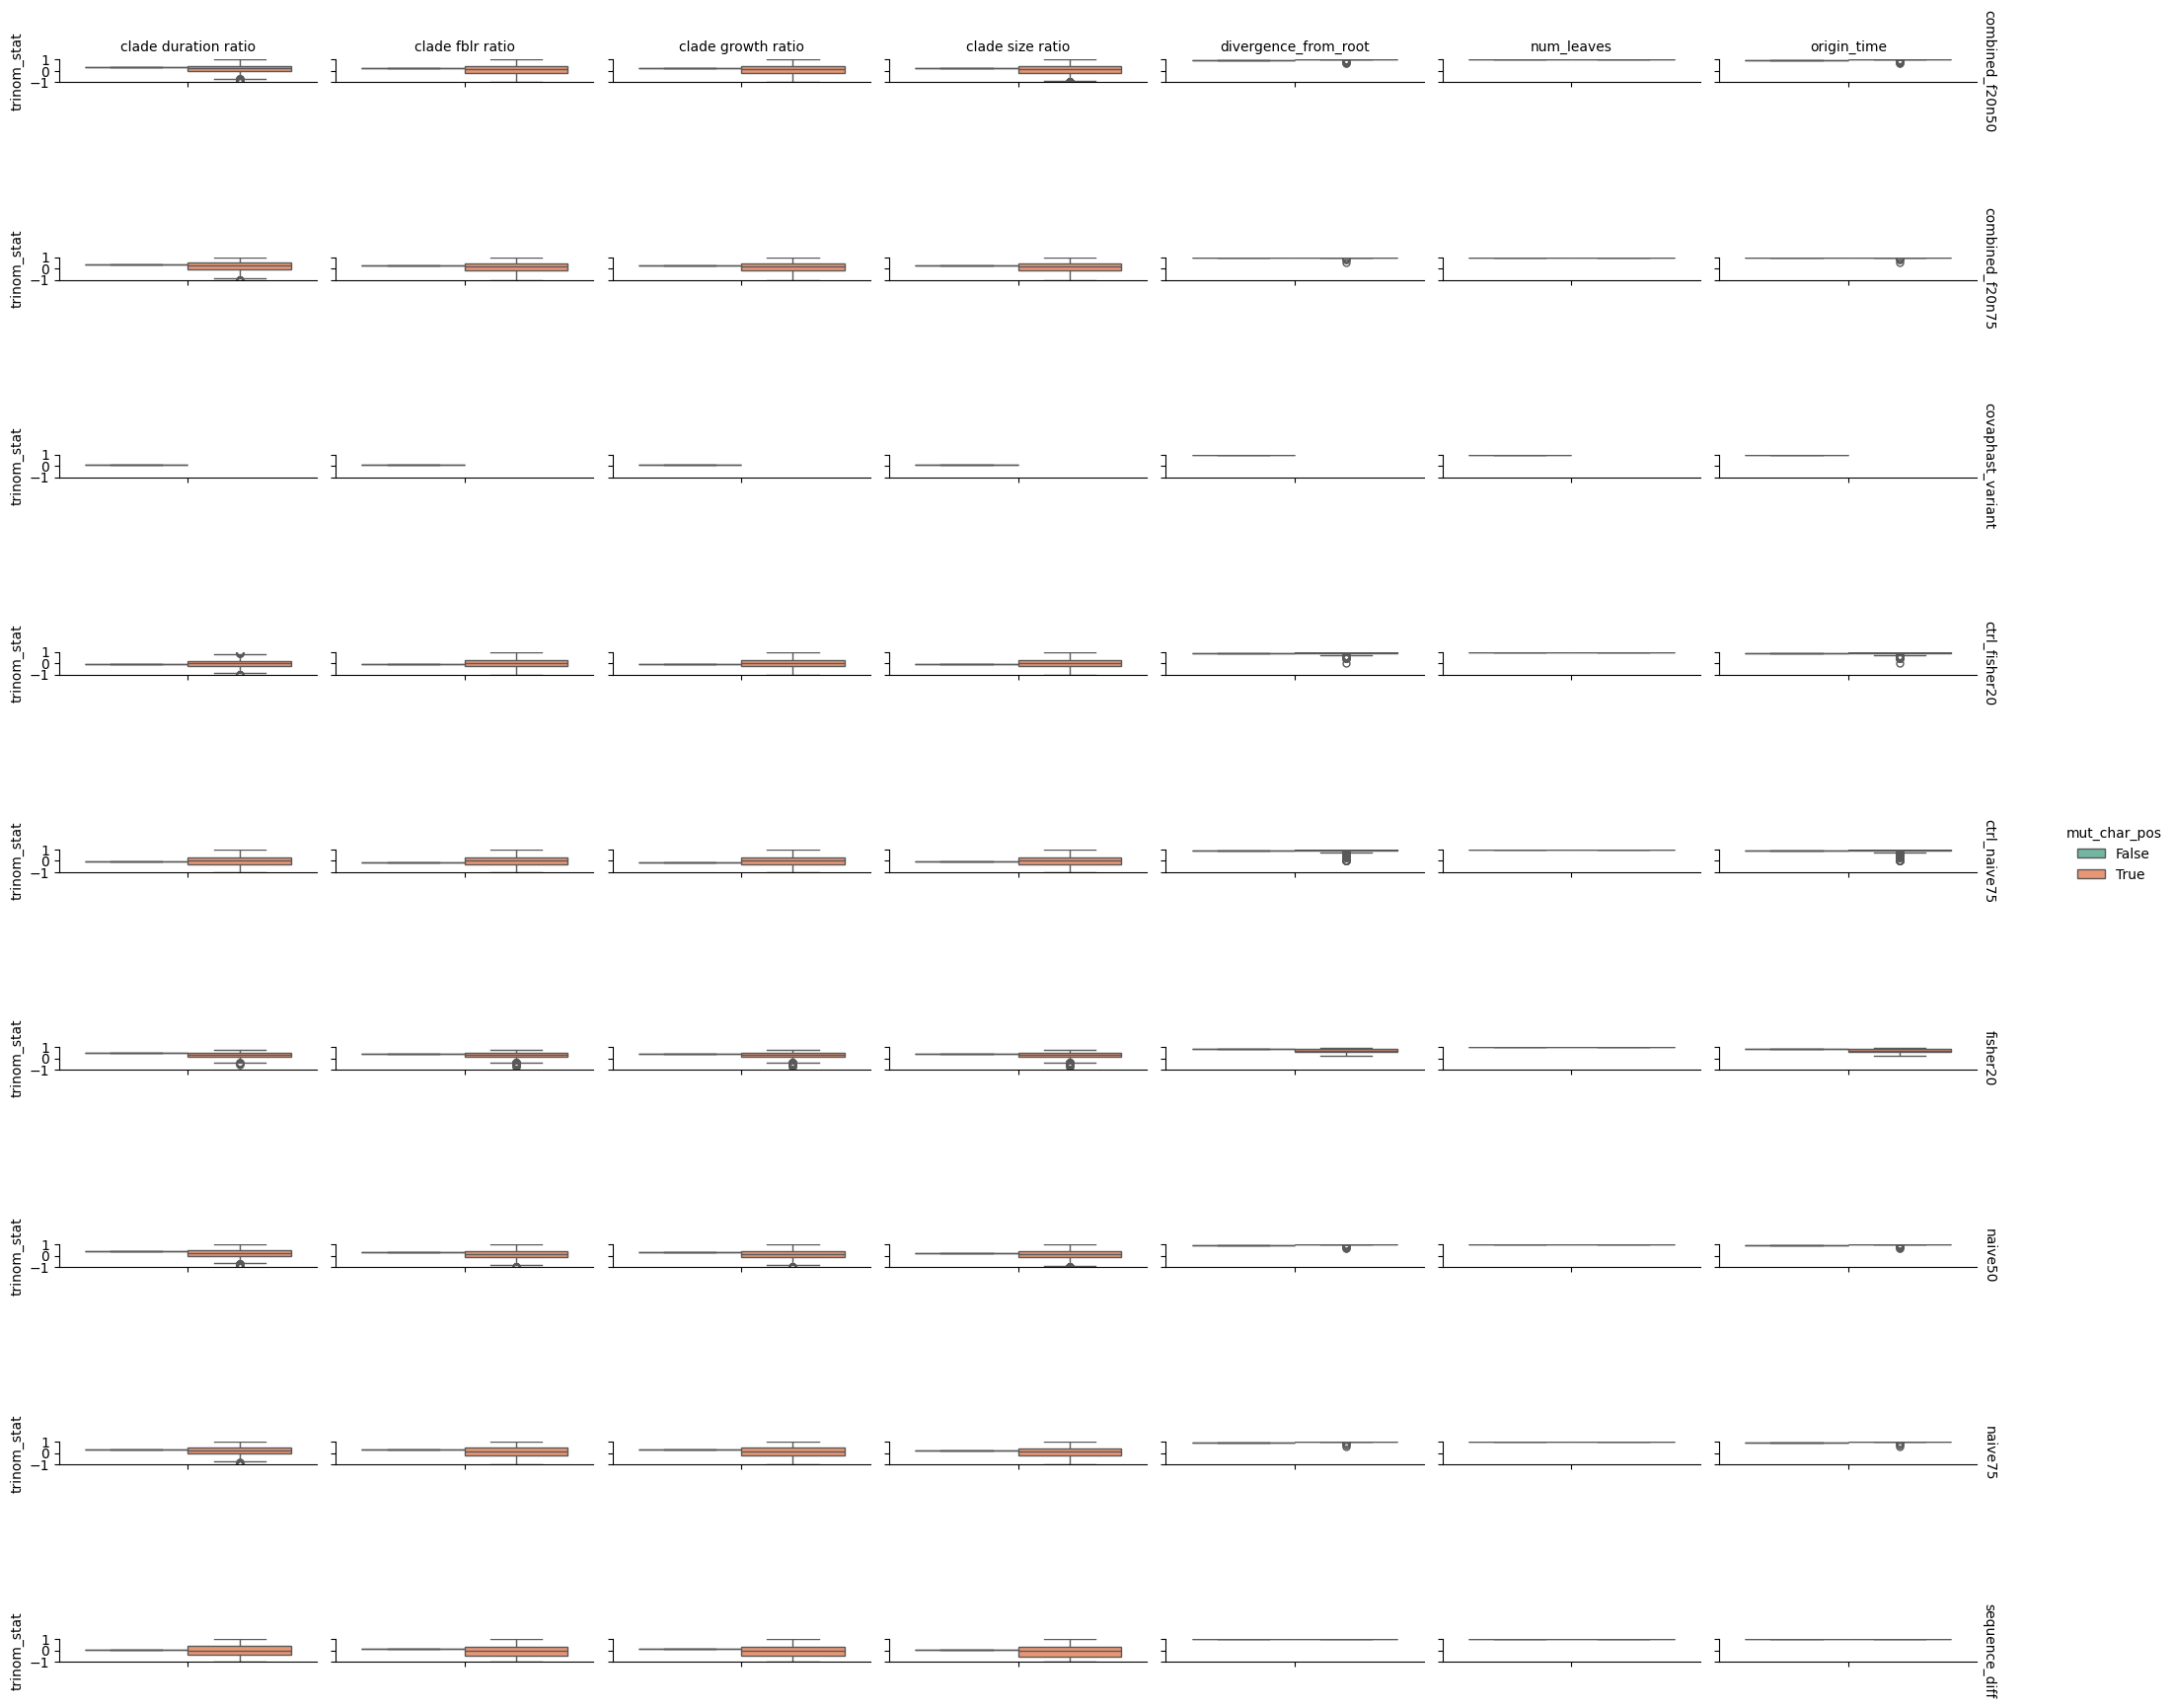

In [12]:
with tp.teed(
    sns.catplot,
    data=screen_df.astype({"mut_char_pos": bool}),
    y="trinom_stat",
    hue="mut_char_pos",
    col="tb_stat",
    row="screen_name",
    kind="box",
    height=2,
    aspect=1.5,
    palette="Set2",
    legend_out=True,
    margin_titles=True,
    teeplot_subdir=teeplot_subdir,
) as teed:
    teed.set_titles(
        row_template="{row_name}",
        col_template="{col_name}",
    )
    teed.set(ylim=(-1, 1))


teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=binom-stat+ext=.pdf
teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=binom-stat+ext=.png


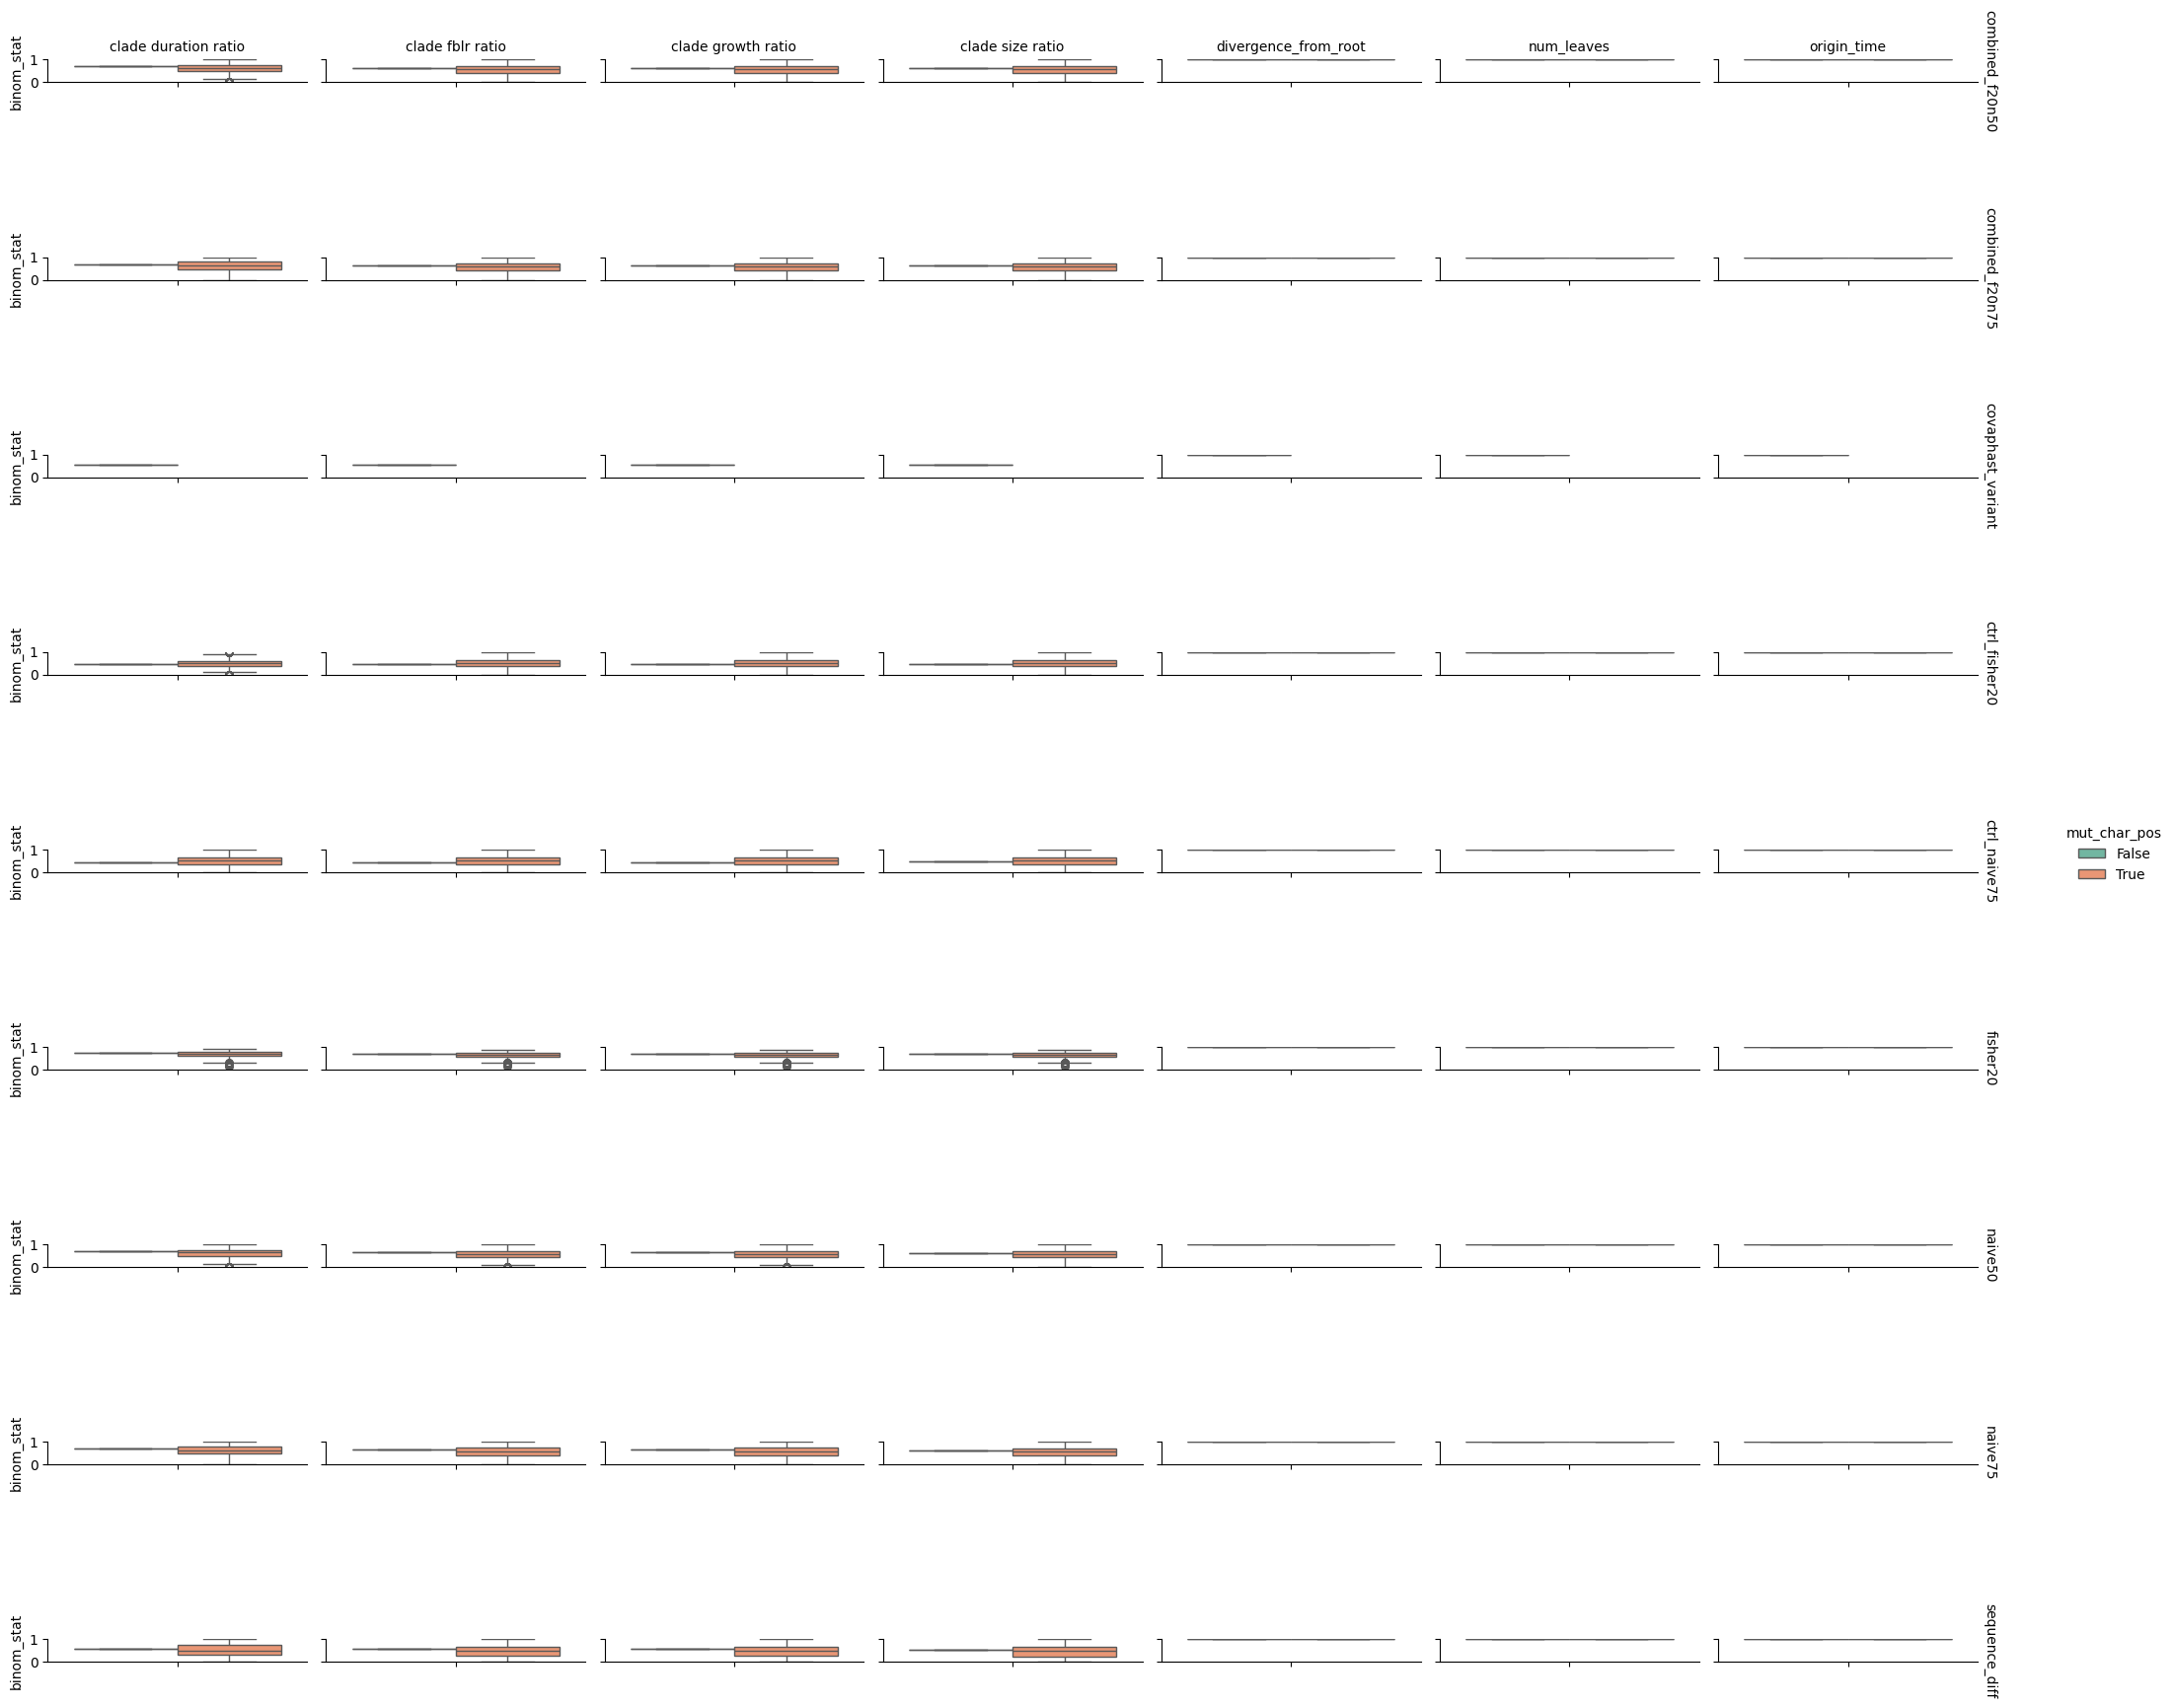

In [13]:
with tp.teed(
    sns.catplot,
    data=screen_df.astype({"mut_char_pos": bool}),
    y="binom_stat",
    hue="mut_char_pos",
    col="tb_stat",
    row="screen_name",
    kind="box",
    height=2,
    aspect=1.5,
    palette="Set2",
    legend_out=True,
    margin_titles=True,
    teeplot_subdir=teeplot_subdir,
) as teed:
    teed.set_titles(
        row_template="{row_name}",
        col_template="{col_name}",
    )
    teed.set(ylim=(0, 1))


teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=screened-nanmedian+ext=.pdf
teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=screened-nanmedian+ext=.png


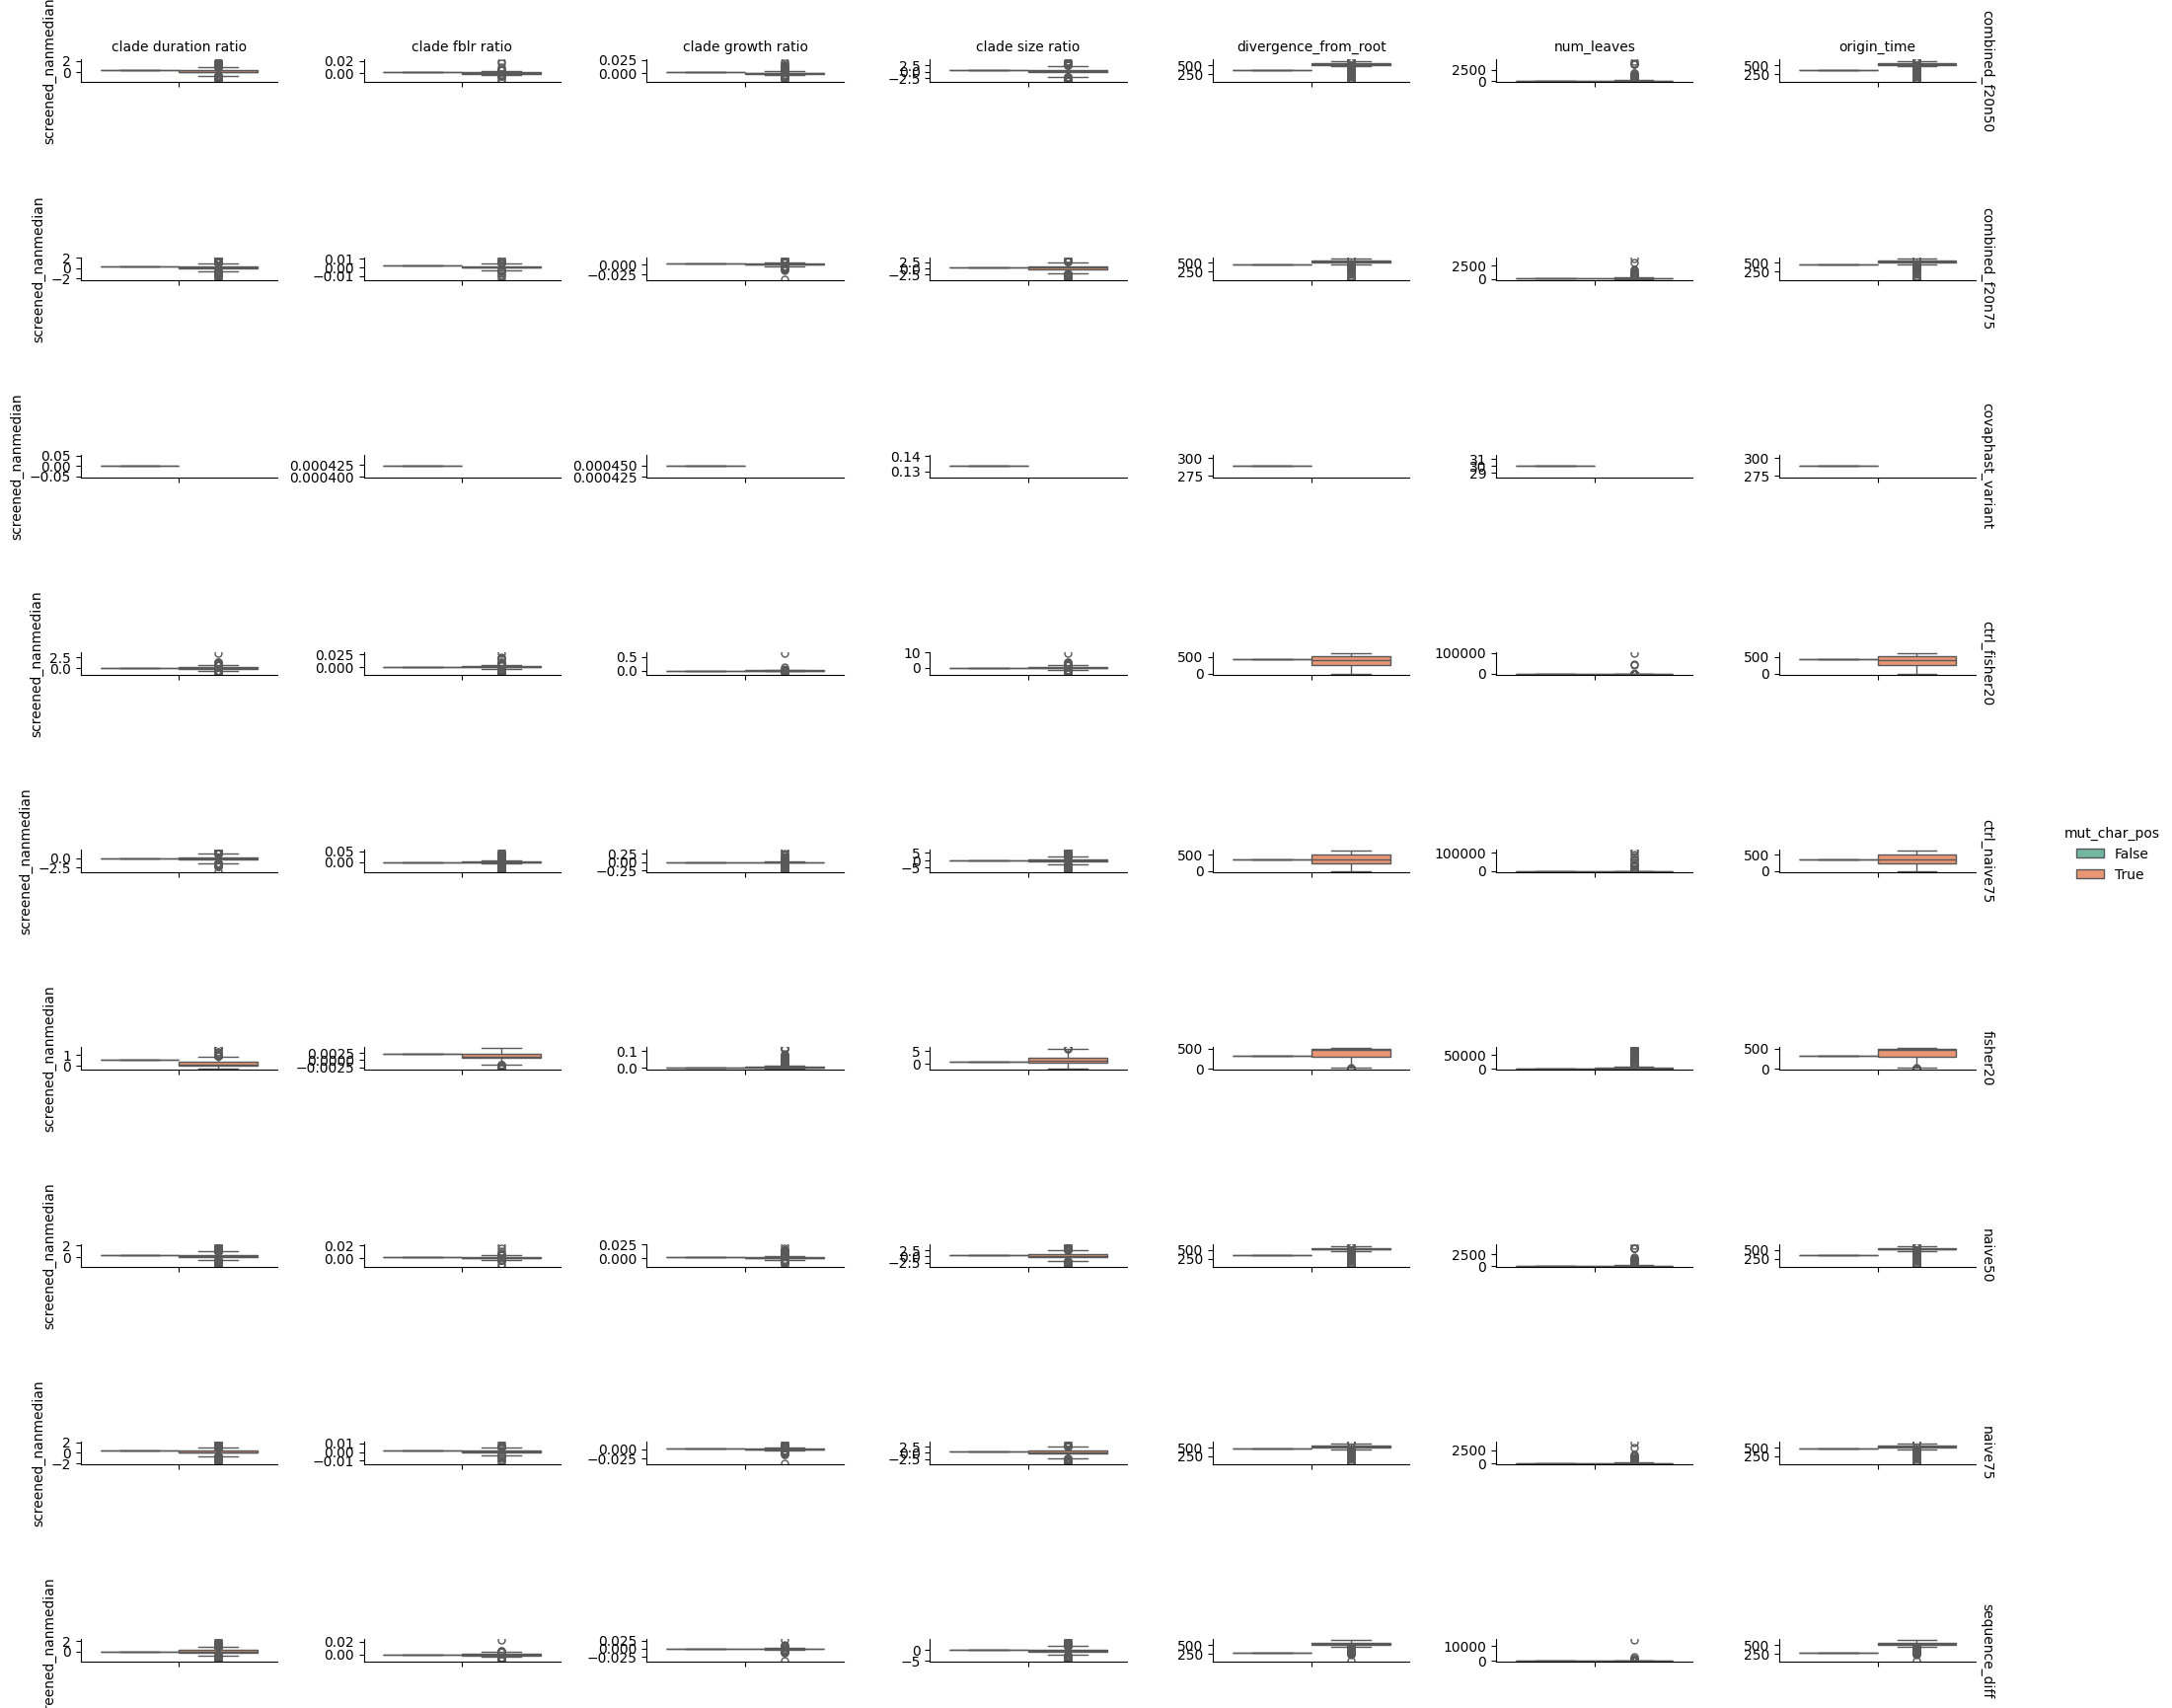

In [14]:
with tp.teed(
    sns.catplot,
    data=screen_df.astype({"mut_char_pos": bool}),
    y="screened_nanmedian",
    hue="mut_char_pos",
    col="tb_stat",
    row="screen_name",
    kind="box",
    height=2,
    aspect=1.5,
    sharey=False,
    palette="Set2",
    legend_out=True,
    margin_titles=True,
    teeplot_subdir=teeplot_subdir,
) as teed:
    teed.set_titles(
        row_template="{row_name}",
        col_template="{col_name}",
    )


teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+x=screen-name+y=background-nanmedian+ext=.pdf
teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+x=screen-name+y=background-nanmedian+ext=.png


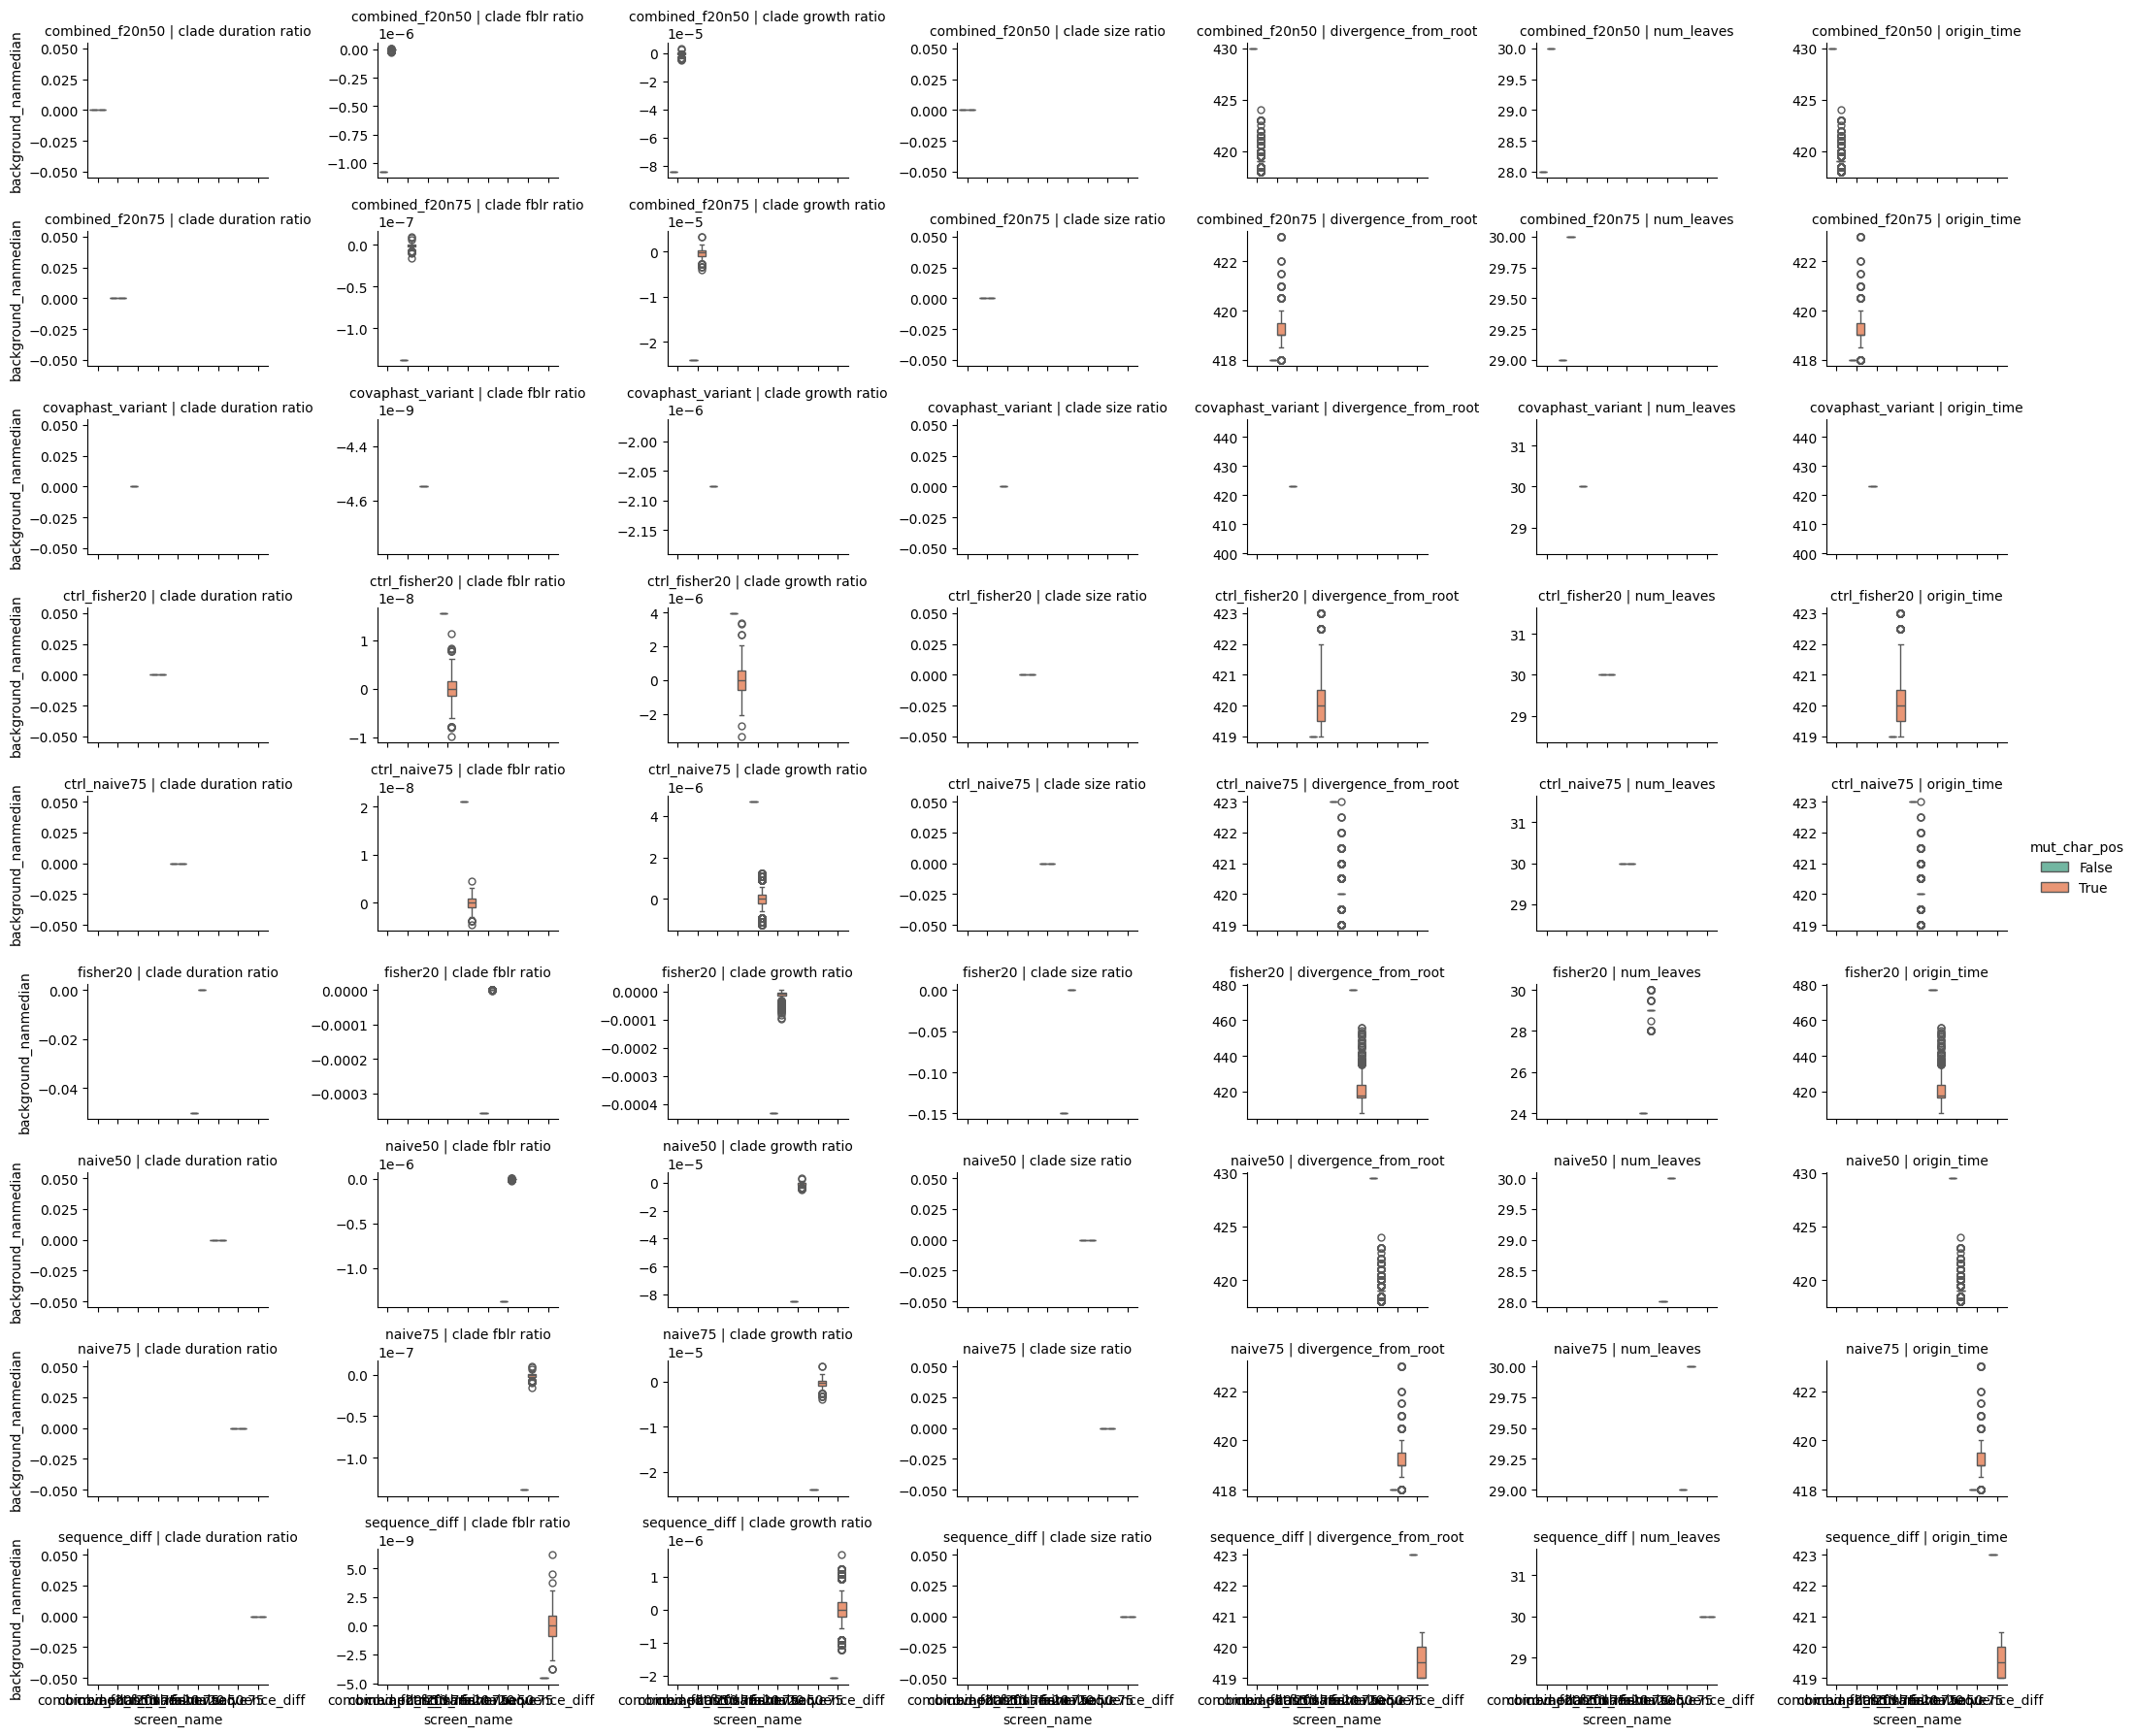

In [15]:
with tp.teed(
    sns.catplot,
    data=screen_df.astype({"mut_char_pos": bool}),
    x="screen_name",
    y="background_nanmedian",
    hue="mut_char_pos",
    col="tb_stat",
    row="screen_name",
    kind="box",
    height=2,
    aspect=1.5,
    sharey=False,
    palette="Set2",
    legend_out=True,
    teeplot_subdir=teeplot_subdir,
) as teed:
    teed.set_titles(
        row_template="{row_name}",
        col_template="{col_name}",
    )
